In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Access folder in Google Drive
folder_path = '/content/drive/MyDrive/AI Project'
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

### Importing dataset




In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AI Project/datasets/Dataset for sentiment analysis.tsv', delimiter = '\t', quoting = 3)

In [ ]:
dataset.shape


(1315, 2)

In [ ]:
# dataset=dataset.head(900)
# dataset.shape

(900, 2)

In [ ]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Data Preprocessing

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]

for i in range(0, 1315):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus

### Data transformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [ ]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

### Dividing dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Model fitting (Naive Bayes)

[[80 59]
 [32 92]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       139
           1       0.61      0.74      0.67       124

    accuracy                           0.65       263
   macro avg       0.66      0.66      0.65       263
weighted avg       0.66      0.65      0.65       263

Sensitivy:  0.7419354838709677
Specificity:  0.5755395683453237


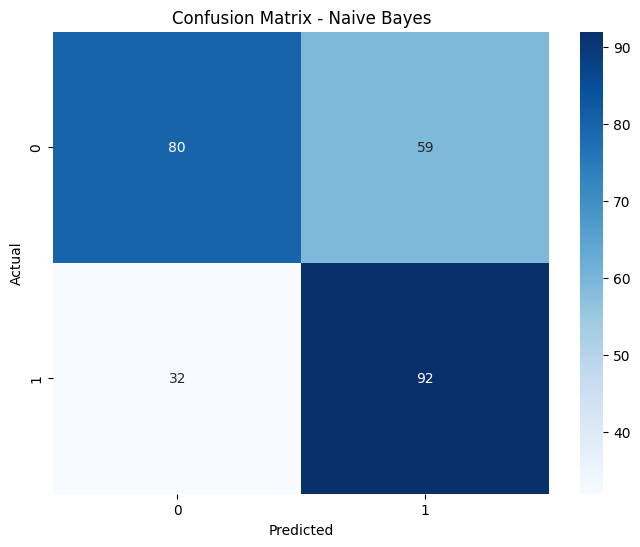

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model')

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)


# Classification report (Naive Bayes)
classification_rep_nb = classification_report(y_test, y_pred)
print("Naive Bayes Classification Report:")
print(classification_rep_nb)

print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

# Get the predicted labels
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

### Model fitting (SVM)

SVM Confusion Matrix:
[[110  29]
 [ 36  88]]
SVM Accuracy: 0.752851711026616
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       139
           1       0.75      0.71      0.73       124

    accuracy                           0.75       263
   macro avg       0.75      0.75      0.75       263
weighted avg       0.75      0.75      0.75       263

Sensitivy:  0.7096774193548387
Specificity:  0.7913669064748201


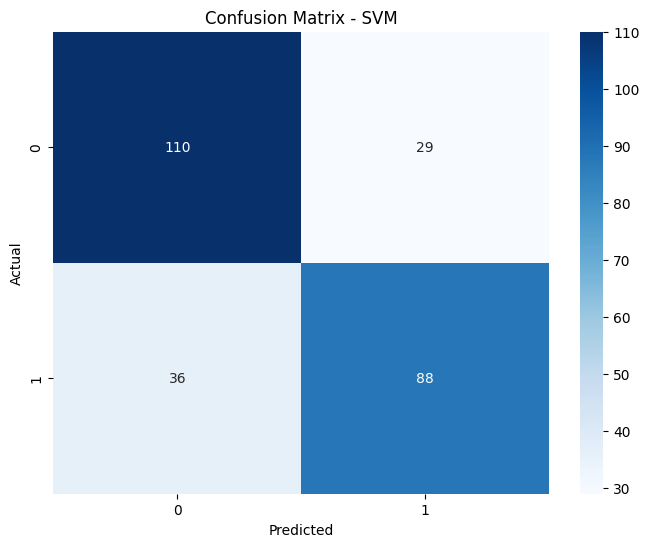

In [ ]:
### Model fitting (SVM)
from sklearn.svm import SVC
from sklearn.metrics import classification_report



classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train, y_train)

# Exporting SVM Classifier to later use in prediction
joblib.dump(classifier_svm, 'c3_SVM_Sentiment_Model')

### Model performance (SVM)
y_pred_svm = classifier_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Classification report (SVM)
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(classification_rep_svm)

print('Sensitivy: ',cm_svm[1][1]/(cm_svm[1][1]+cm_svm[1][0]))
print('Specificity: ',cm_svm[0][0]/(cm_svm[0][0]+cm_svm[0][1]))


# Get the predicted labels
y_pred_svm = classifier_svm.predict(X_test)

# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_svm)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()


### Model fitting (Random Forest)

Random Forest Confusion Matrix:
[[115  24]
 [ 43  81]]
Random Forest Accuracy: 0.7452471482889734
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       139
           1       0.77      0.65      0.71       124

    accuracy                           0.75       263
   macro avg       0.75      0.74      0.74       263
weighted avg       0.75      0.75      0.74       263

Sensitivy:  0.6532258064516129
Specificity:  0.8273381294964028


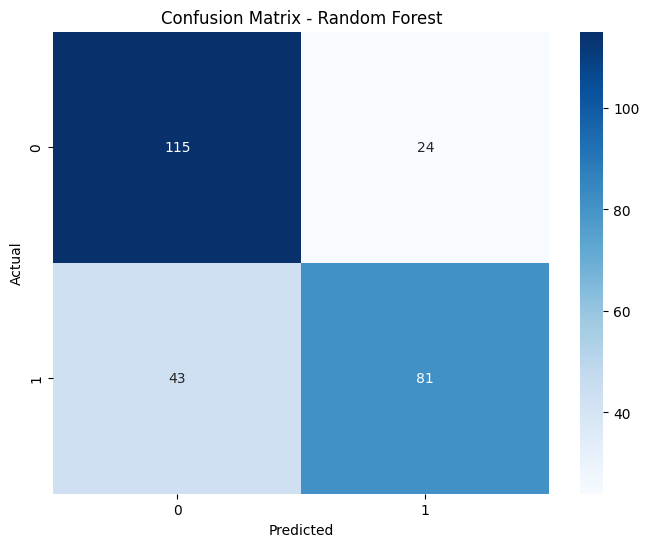

In [ ]:
### Model fitting (Random Forest)
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_rf.fit(X_train, y_train)

# Exporting Random Forest Classifier to later use in prediction
joblib.dump(classifier_rf, 'c3_RF_Sentiment_Model')

### Model performance (Random Forest)
y_pred_rf = classifier_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification report (Random Forest)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(classification_rep_rf)

print('Sensitivy: ',cm_rf[1][1]/(cm_rf[1][1]+cm_rf[1][0]))
print('Specificity: ',cm_rf[0][0]/(cm_rf[0][0]+cm_rf[0][1]))


# Get the predicted labels
y_pred_rf = classifier_rf.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_rf)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

### Model fitting (Gradient Boosting)

Gradient Boosting Confusion Matrix:
[[135   4]
 [ 58  66]]
Gradient Boosting Accuracy: 0.7642585551330798
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.81       139
           1       0.94      0.53      0.68       124

    accuracy                           0.76       263
   macro avg       0.82      0.75      0.75       263
weighted avg       0.81      0.76      0.75       263

Sensitivy:  0.532258064516129
Specificity:  0.9712230215827338


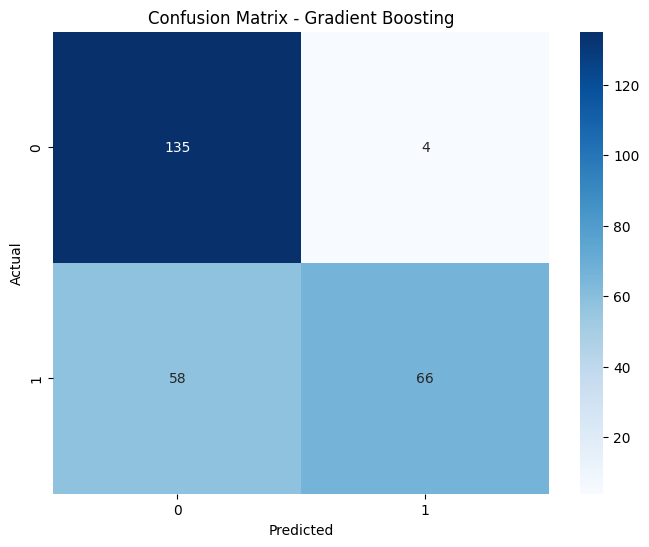

In [ ]:
### Model fitting (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
classifier_gb.fit(X_train, y_train)

# Exporting Gradient Boosting Classifier to later use in prediction
joblib.dump(classifier_gb, 'c4_GB_Sentiment_Model')

### Model performance (Gradient Boosting)
y_pred_gb = classifier_gb.predict(X_test)

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
print(cm_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Classification report (Gradient Boosting)
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:")
print(classification_rep_gb)

print('Sensitivy: ',cm_gb[1][1]/(cm_gb[1][1]+cm_gb[1][0]))
print('Specificity: ',cm_gb[0][0]/(cm_gb[0][0]+cm_gb[0][1]))



# Get the predicted labels
y_pred_gb = classifier_gb.predict(X_test)

# Calculate the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_gb)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

### Model fitting (Logistic Regression)

Logistic Regression Confusion Matrix:
[[114  25]
 [ 35  89]]
Logistic Regression Accuracy: 0.7718631178707225
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       139
           1       0.78      0.72      0.75       124

    accuracy                           0.77       263
   macro avg       0.77      0.77      0.77       263
weighted avg       0.77      0.77      0.77       263

Sensitivy:  0.717741935483871
Specificity:  0.8201438848920863


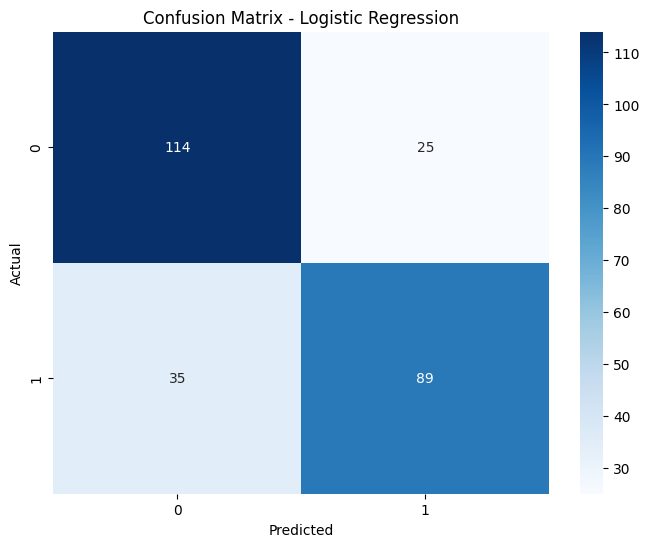

In [ ]:
### Model fitting (Logistic Regression)
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

# Exporting Logistic Regression Classifier to later use in prediction
joblib.dump(classifier_lr, 'c5_LR_Sentiment_Model')

### Model performance (Logistic Regression)
y_pred_lr = classifier_lr.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Classification report (Logistic Regression)
classification_rep_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(classification_rep_lr)

print('Sensitivy: ',cm_lr[1][1]/(cm_lr[1][1]+cm_lr[1][0]))
print('Specificity: ',cm_lr[0][0]/(cm_lr[0][0]+cm_lr[0][1]))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Get the predicted labels
y_pred_lr = classifier_lr.predict(X_test)

# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_lr)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

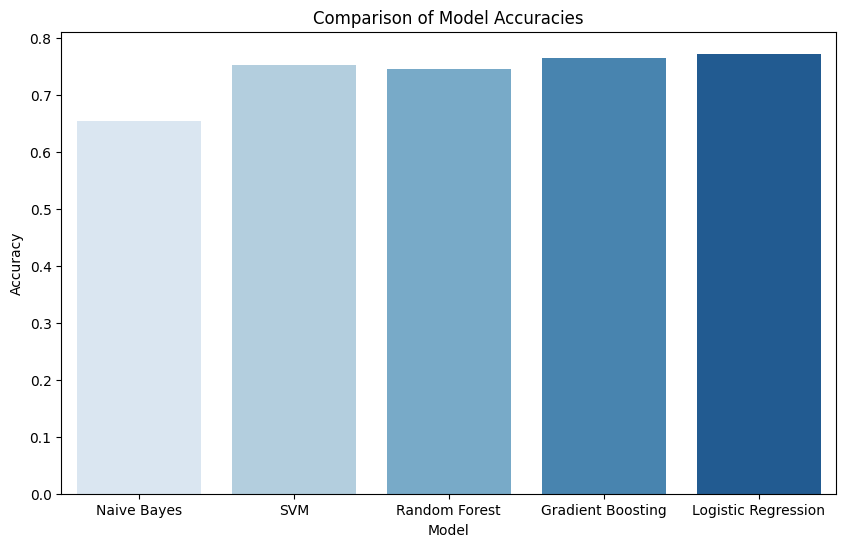

In [ ]:
# Create a list of model names and their corresponding accuracies
model_names = ['Naive Bayes', 'SVM', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred), accuracy_svm, accuracy_rf, accuracy_gb, accuracy_lr]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='Blues')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Display the plot
plt.show()
